# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import joblib
import os

In [10]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [11]:
def show_img(images: np.ndarray, labels: np.ndarray, emotions):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(emotions[label]))

In [12]:
def plot_examples(images, labels, emotions, label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace=.2, wspace=.2)
    axs = axs.ravel()

    # Find indices of images with the specified label
    label_indices = [i for i, lbl in enumerate(labels) if lbl == label]

    for i in range(5):
        idx = label_indices[i]
        axs[i].imshow(images[idx], cmap='gray')
        axs[i].set_title(emotions[labels[idx]])
        axs[i].set_xticks([])
        axs[i].set_yticks([])

In [17]:
## load dataset here
df = pd.read_csv("../data/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [18]:
display(df.shape)
display(df.info())

(35887, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


None

In [19]:
num_classes = df['emotion'].nunique()
print('Number of classes ',num_classes)

Number of classes  7


We have 7 emotions here:

0: angry

1: disgust

2: fear

3: happy

4: sad

5: surprise

6: neutral

In [20]:
df['emotion'].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

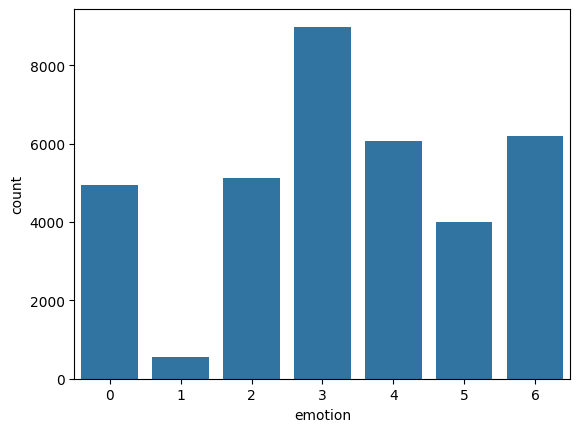

In [21]:
sns.countplot(x='emotion', data=df)
plt.show()

Very less data for emotion 1, which is disgust, so it will act as noise for other emotions and reducing the number of images for emotion 3.

In [22]:
## parsing data here
images, labels = parse_data(df)

In [23]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

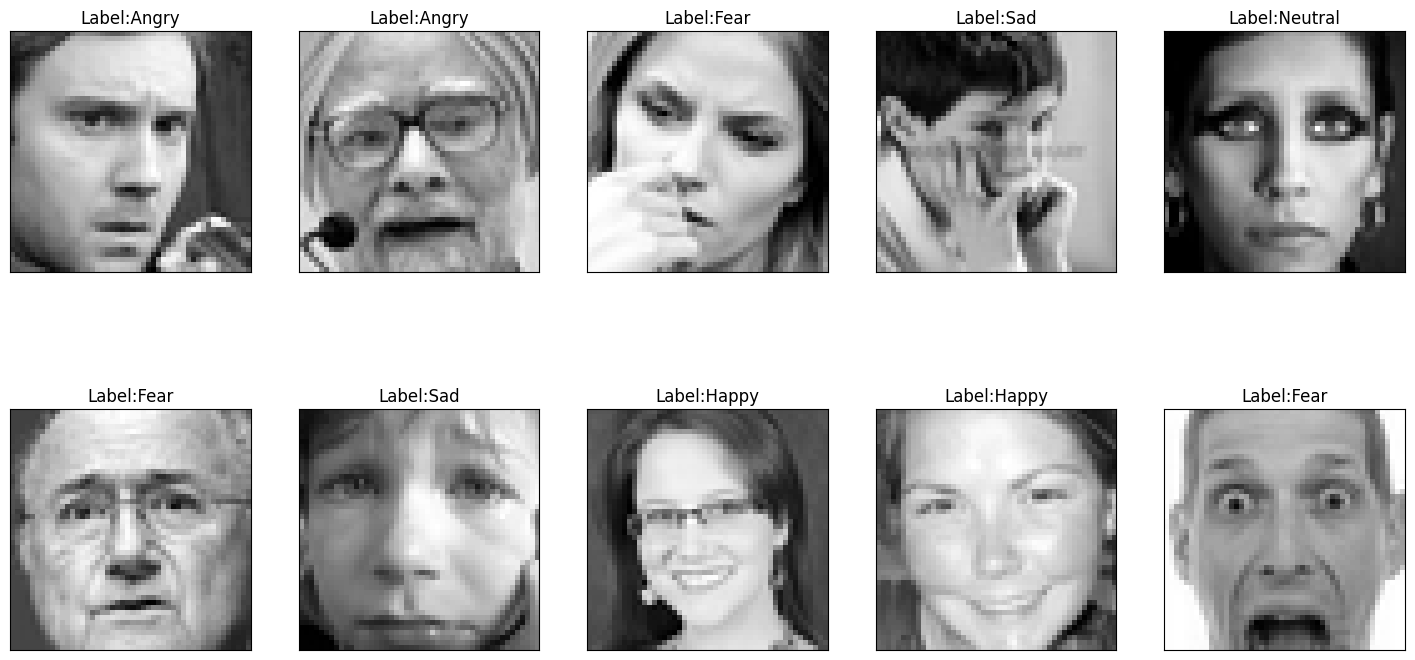

In [24]:
## showing images here
show_img(images, labels, emotions)

Angry

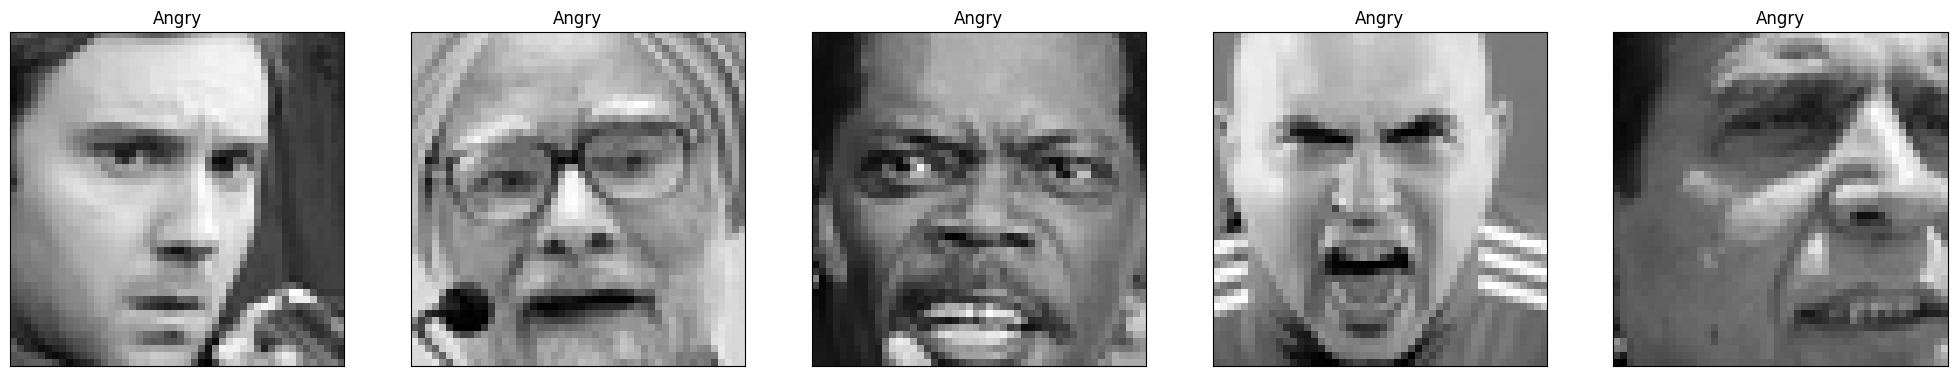

In [25]:
plot_examples(images, labels, emotions, label=0)

Disgust

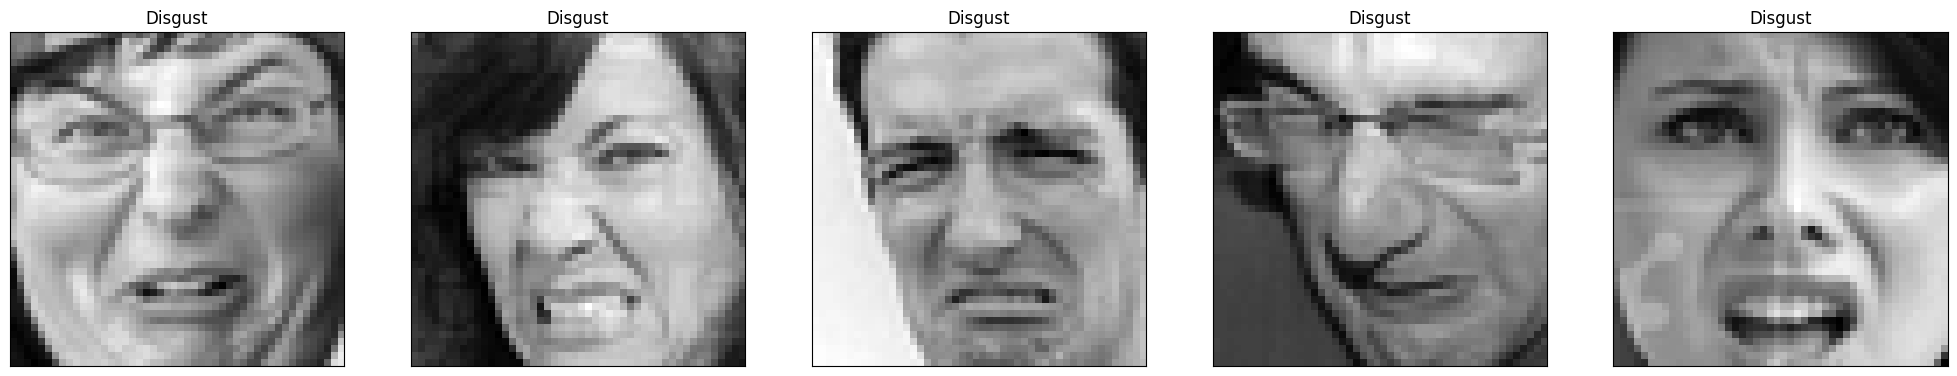

In [26]:
plot_examples(images, labels, emotions, label=1)

Fear

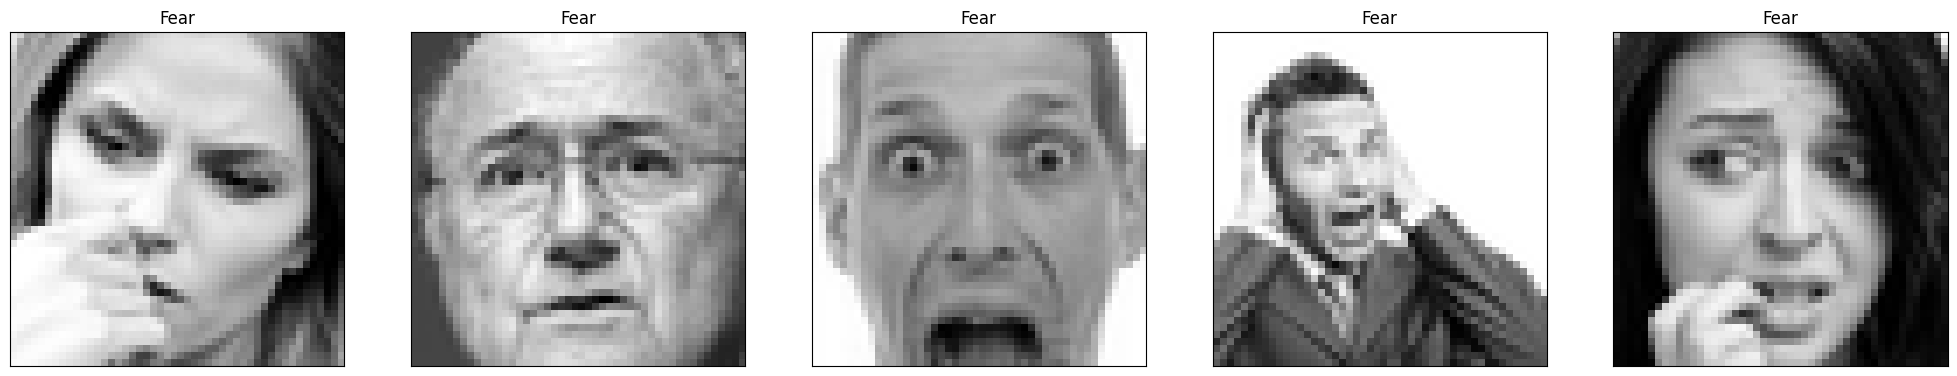

In [27]:
plot_examples(images, labels, emotions, label=2)

Happy

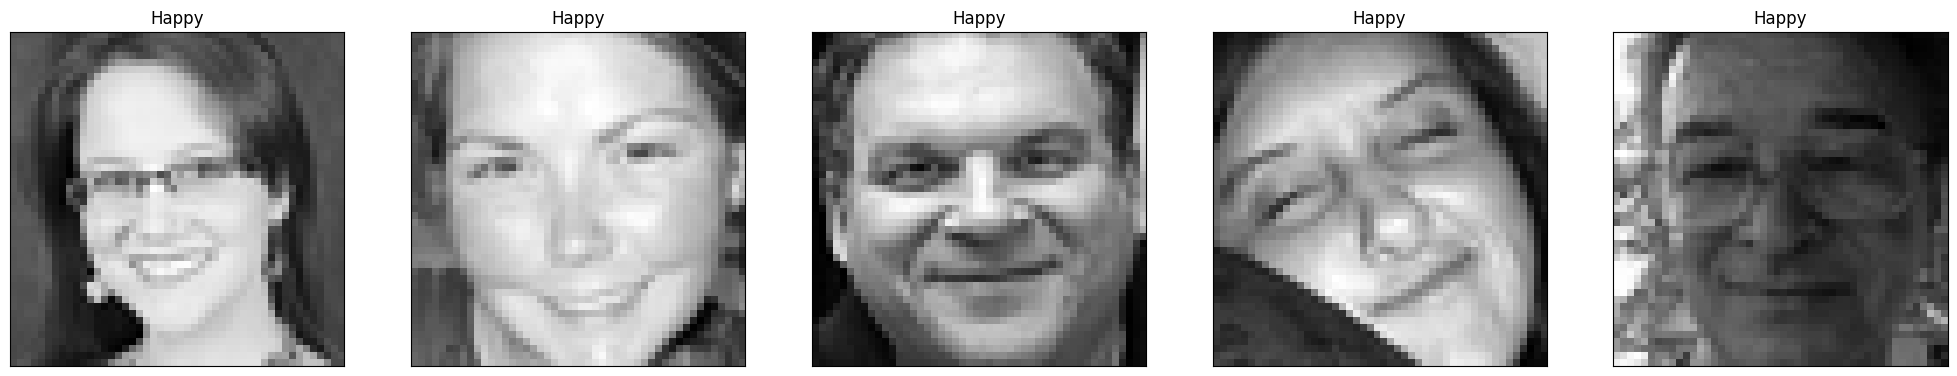

In [28]:
plot_examples(images, labels, emotions, label=3)

Sad

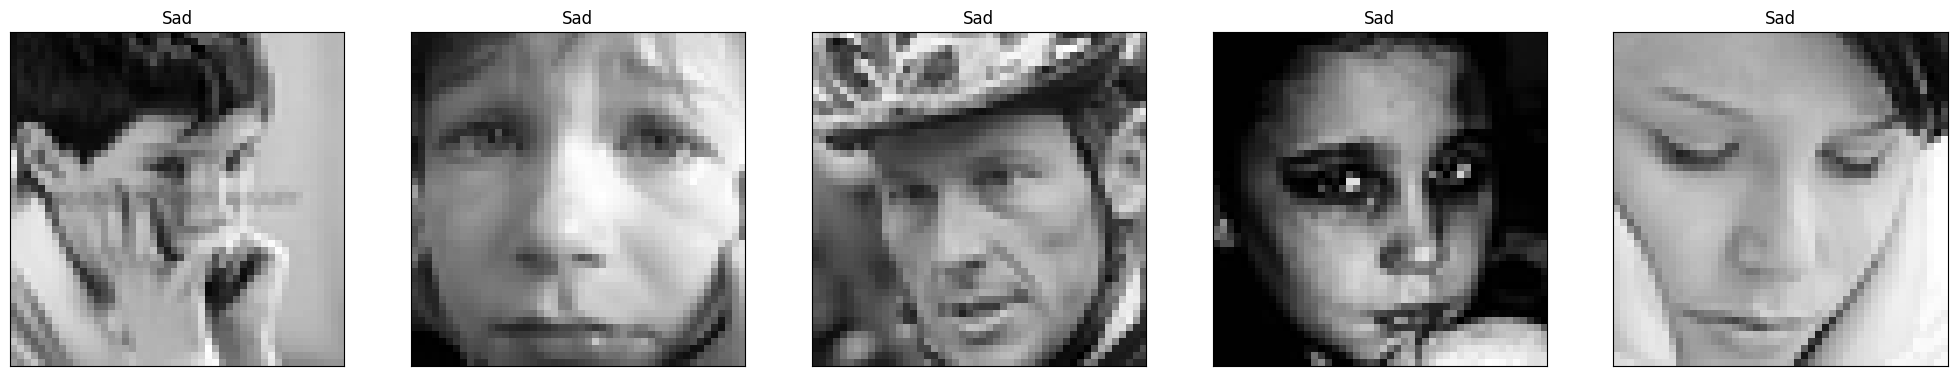

In [29]:
plot_examples(images, labels, emotions, label=4)

Surprise

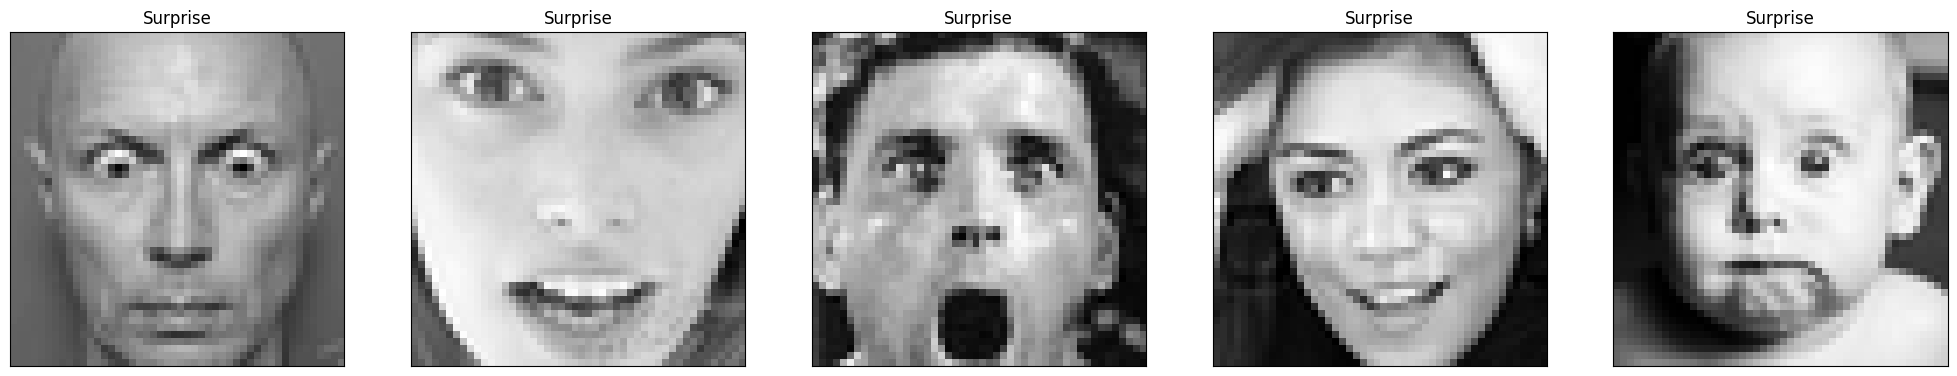

In [30]:
plot_examples(images, labels, emotions, label=5)

Neutral

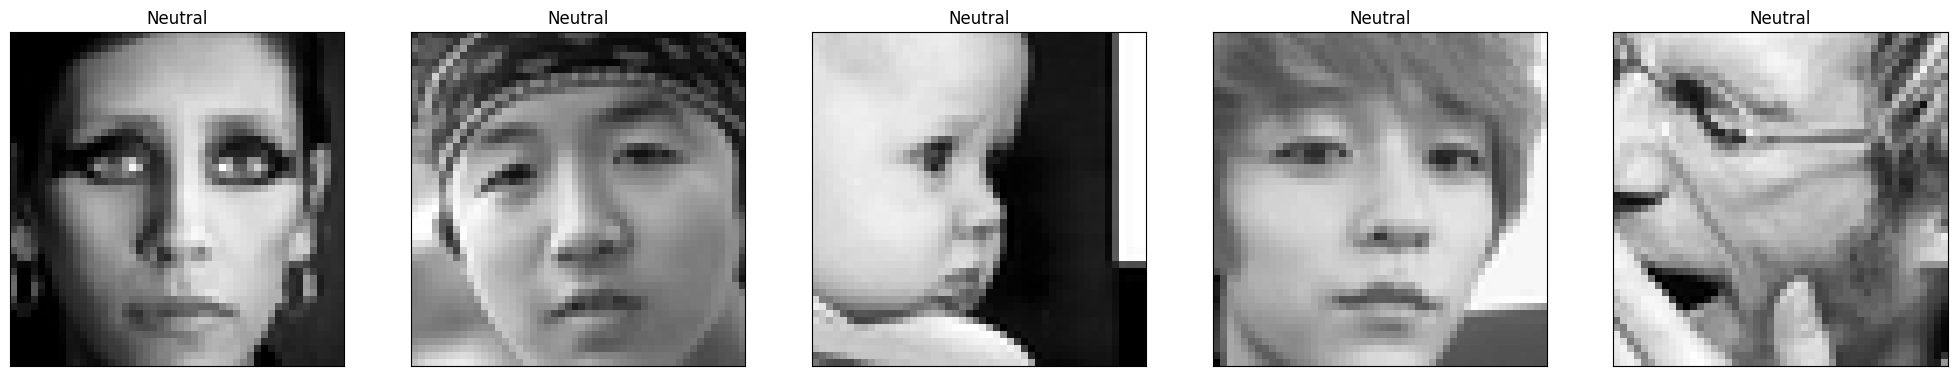

In [31]:
plot_examples(images, labels, emotions, label=6)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [32]:
# Reshape the image_array to 2D array where each row is an image
num_images, height, width = images.shape
image_array_reshaped = images.reshape(num_images, height * width)

In [33]:
from sklearn.decomposition import PCA

def apply_PCA(data, n_images, n_components, plot=False):
    pca = PCA(n_components = n_components)
    principal_components = pca.fit_transform(data)

    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=principal_components)

    # Reconstructed image
    image_array_reconstructed = pca.inverse_transform(principal_components)
    image_array_reconstructed = image_array_reconstructed.reshape(n_images, 48, 48)

    if plot:
        for index in range(num_classes):
            plot_examples(images, labels, emotions, label=index)
            plot_examples(image_array_reconstructed, labels, emotions, label=index)

    return pca_df


In [34]:
pca_df = apply_PCA(data= image_array_reshaped, n_images=num_images, n_components= 2)

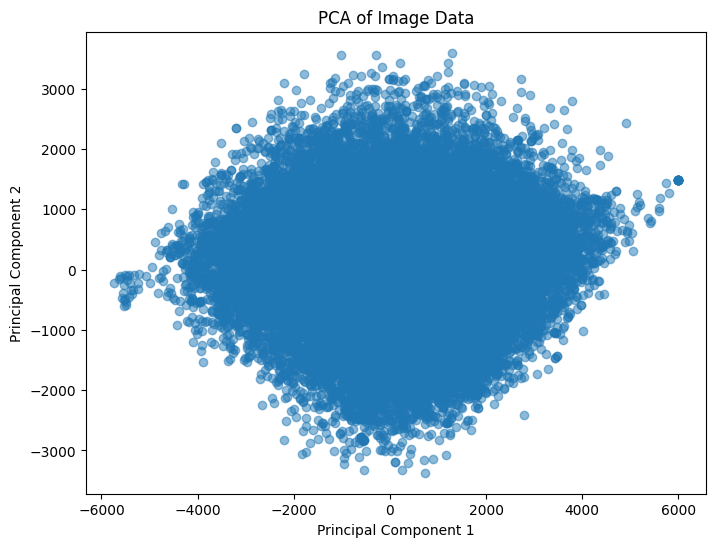

In [35]:
# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[0], pca_df[1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Image Data')
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [36]:
pca = PCA().fit(image_array_reshaped)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

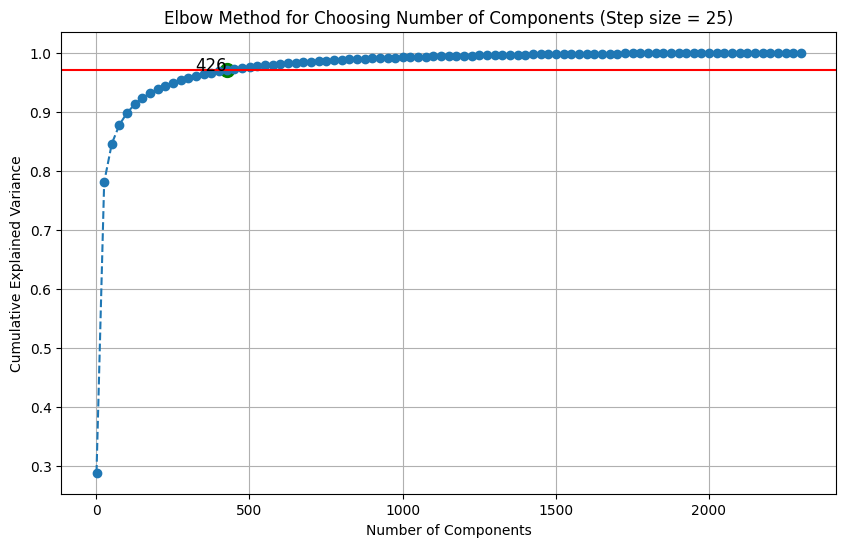

426

In [37]:
# Fit PCA and calculate explained variance
pca = PCA().fit(image_array_reshaped)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Calculate explained variance with step size of 5
step_size = 25
components = np.arange(1, len(cumulative_explained_variance) + 1, step_size)
cumulative_explained_variance_steps = cumulative_explained_variance[components - 1]

# Define a threshold for cumulative explained variance
threshold = 0.97

# Find the first component that exceeds the threshold
components_above_threshold = cumulative_explained_variance_steps > threshold
first_component_above_threshold = components[components_above_threshold][0]

# Plot the cumulative explained variance with step size of 5
plt.figure(figsize=(10, 6))
plt.plot(components, cumulative_explained_variance_steps, marker='o', linestyle='--')

# Plot the threshold line
plt.axhline(y=threshold, color='r', linestyle='-')

# Highlight the marker just above the threshold
plt.scatter(first_component_above_threshold, cumulative_explained_variance[first_component_above_threshold - 1], color='g', s=100)

# Annotate the plot with the chosen number of components
plt.text(first_component_above_threshold, cumulative_explained_variance[first_component_above_threshold - 1], f'{first_component_above_threshold}', fontsize=12, ha='right')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title(f'Elbow Method for Choosing Number of Components (Step size = {step_size})')
plt.grid(True)
plt.show()

# Output the chosen number of components
first_component_above_threshold

,0,1,2,3,4,5,6,7,8,9,...,416,417,418,419,420,421,422,423,424,425
0,691.750859,-442.328649,-864.125553,389.987453,-511.411672,127.585443,106.166386,-52.826668,85.209730,152.914880,...,-24.226937,61.606336,43.119875,3.676114,-8.816384,-27.517576,7.238338,-49.621848,10.676024,2.644901
1,-62.025489,561.762207,565.149735,455.007830,-686.491870,91.659218,485.512104,142.392073,-86.236961,192.286571,...,11.548356,32.213263,-29.249537,-1.821704,-11.292843,-46.965071,-24.442582,23.968397,-32.227504,10.808741
2,-1322.538070,-415.729686,-1930.813479,-268.862098,-810.788511,-951.422629,-1100.750593,285.101932,-318.091258,-58.438839,...,-49.590688,43.406189,6.308793,3.049773,-26.695225,17.208980,-62.279764,31.557053,-15.198916,6.259722
3,-232.277887,656.803932,1417.060237,-1411.819979,736.970356,-27.561186,-971.055416,-661.773377,-275.999086,-251.127226,...,17.916841,-3.830606,27.357763,22.148108,10.970766,-36.143743,-1.317010,14.762593,20.412632,-38.728949
4,1796.585834,-2005.093949,305.005651,-17.154925,-349.092367,-693.297635,-50.472897,28.735146,354.100711,570.006557,...,23.905446,19.378005,-7.430767,-32.873402,25.702881,-13.695132,1.460504,15.874788,-58.908632,15.978840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35882,3033.753533,481.233810,1276.661224,-300.011563,-658.702231,458.338760,578.923949,96.280597,-250.281859,-43.548122,...,4.648597,-22.870516,19.424916,4.866486,-18.318258,-13.443613,26.921200,6.210380,9.393143,-20.840552
35883,-2074.831840,167.194818,-305.062004,297.582175,349.849567,-72.597087,14.591483,-422.658345,-64.036339,-178.440724,...,-35.758362,1.292428,13.812039,5.343600,-30.220932,25.267208,-5.958749,-19.642083,-15.575868,-20.431227
35884,-1289.155652,-1408.568320,411.251518,-1078.462314,827.785622,385.124107,47.818907,-9.396568,189.472077,-811.459322,...,-44.559201,-48.917228,-71.820250,2.899121,4.781828,33.950225,-1.572521,6.165953,73.343552,-1.289544
35885,2008.413571,-125.610909,-502.706081,352.313999,-195.174302,179.763927,-504.486495,210.810344,62.214385,-954.060154,...,-3.850199,10.333334,-14.809626,50.731175,23.284548,14.167667,4.280456,20.266720,12.518328,-20.543286


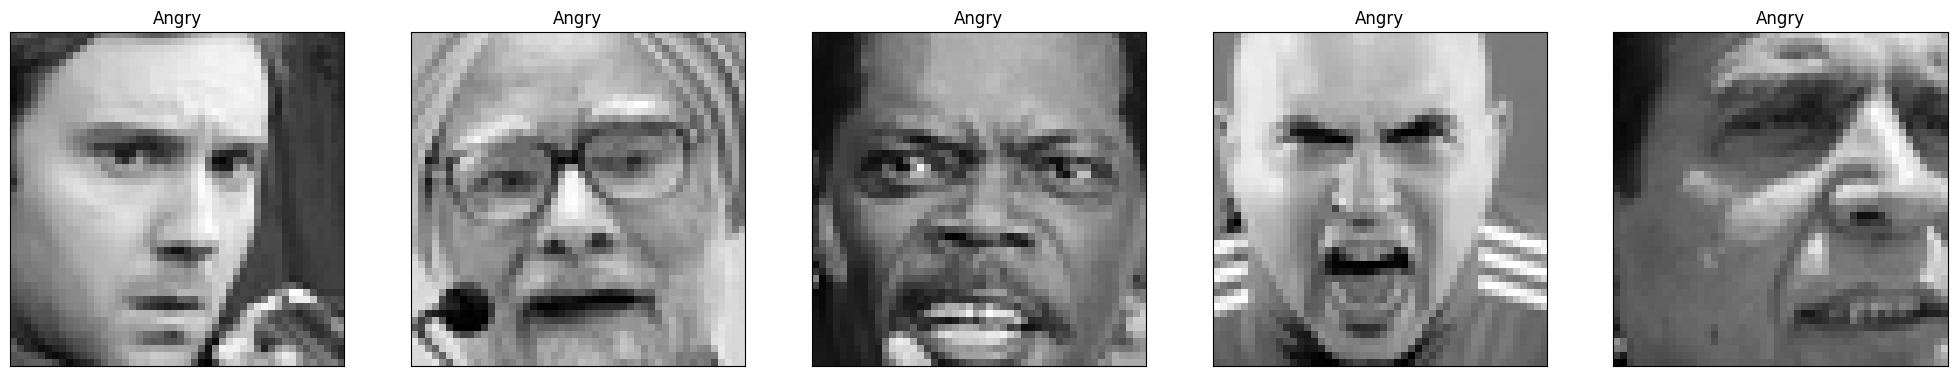

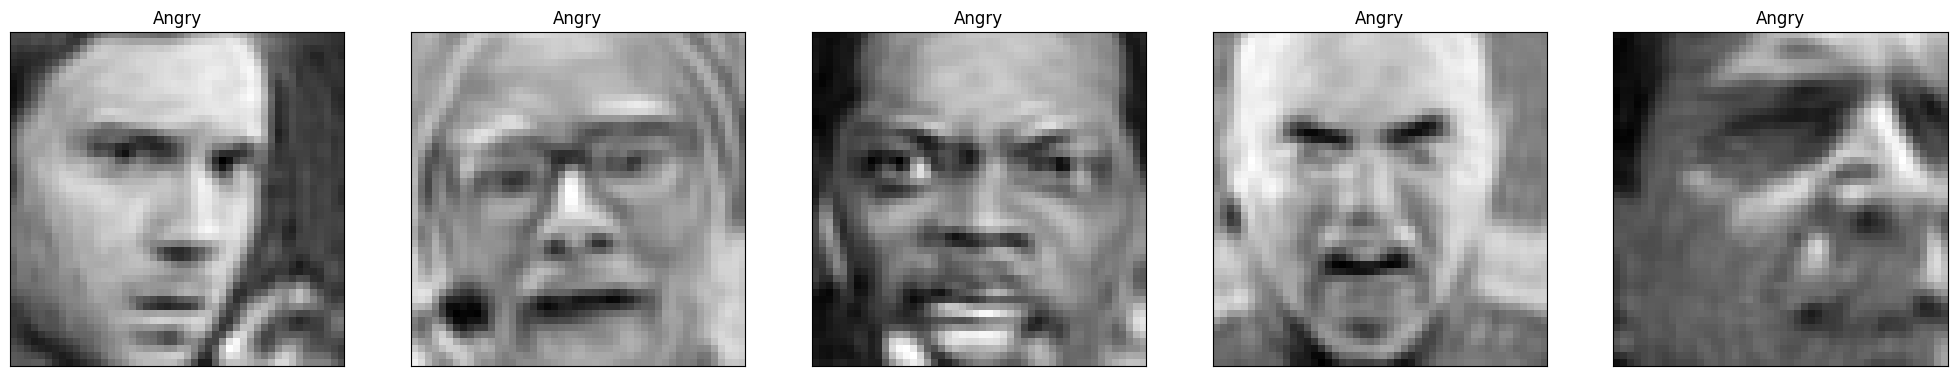

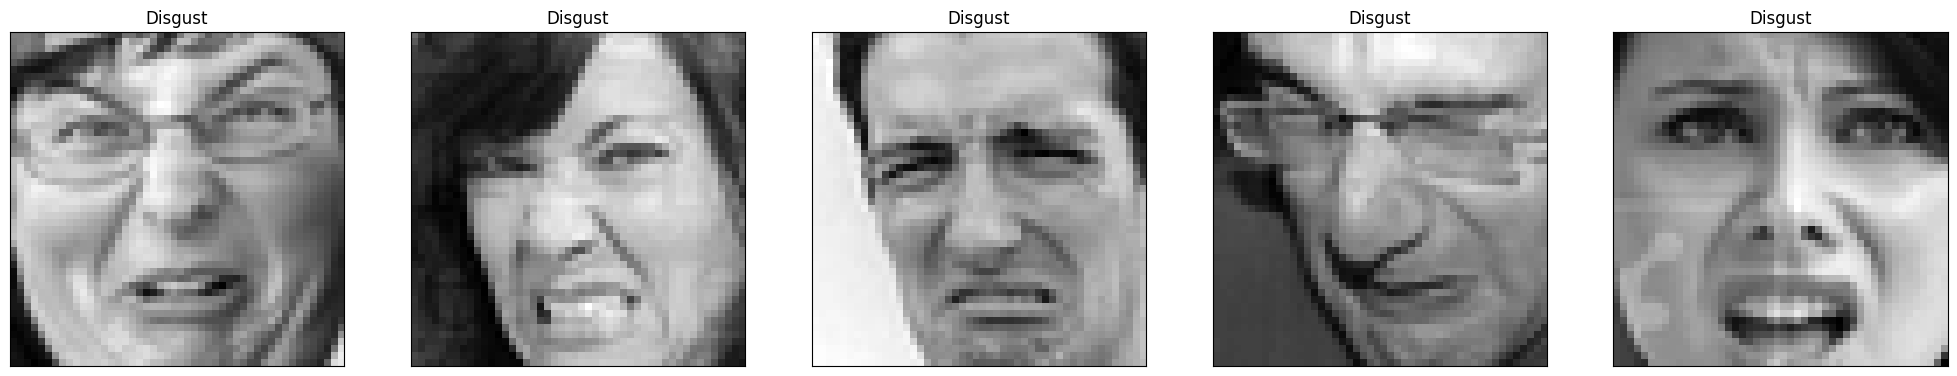

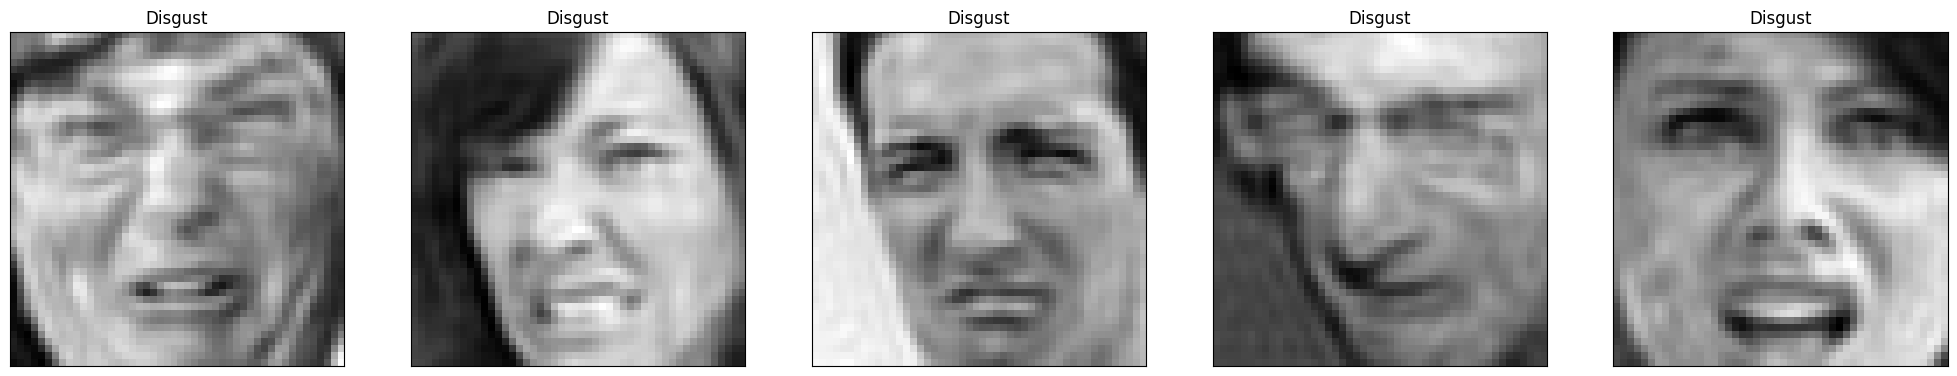

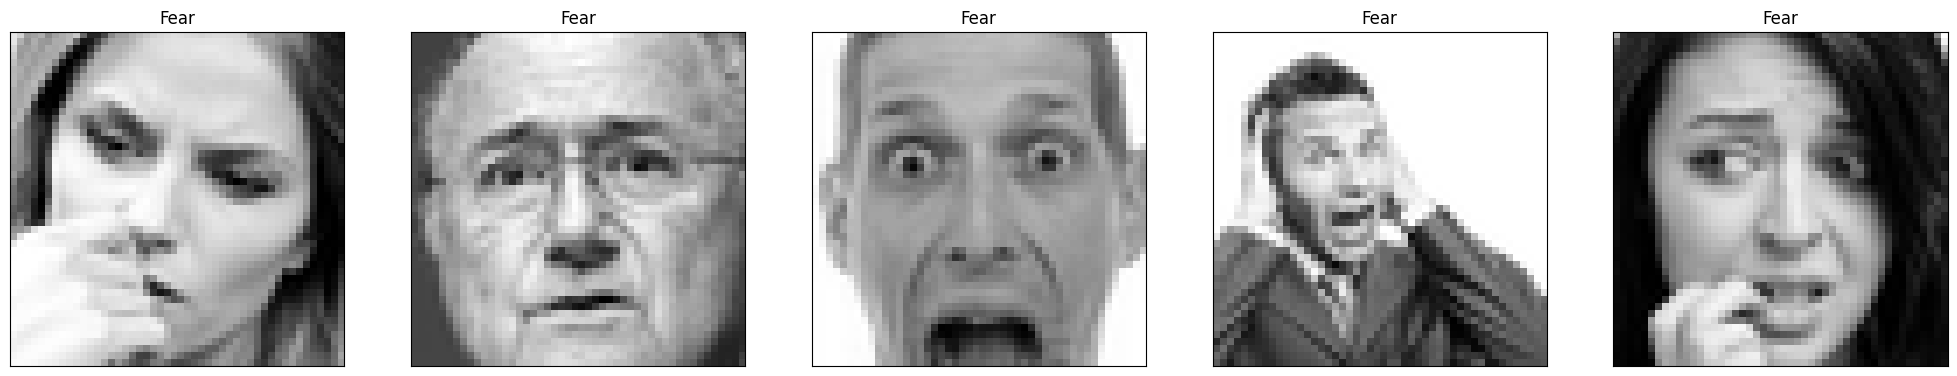

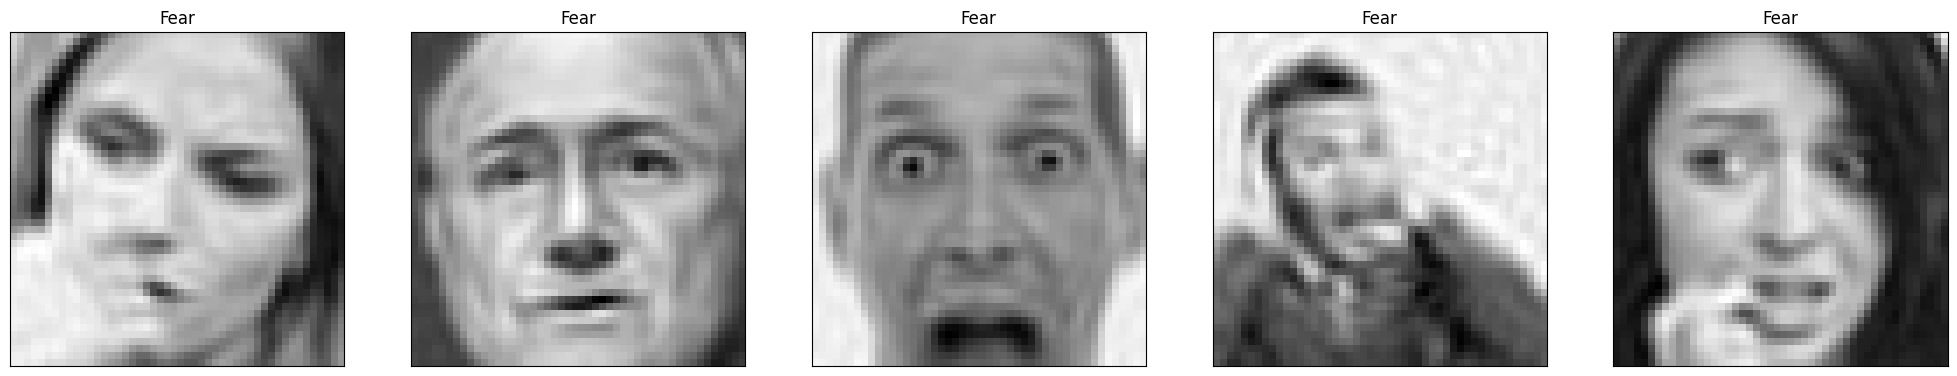

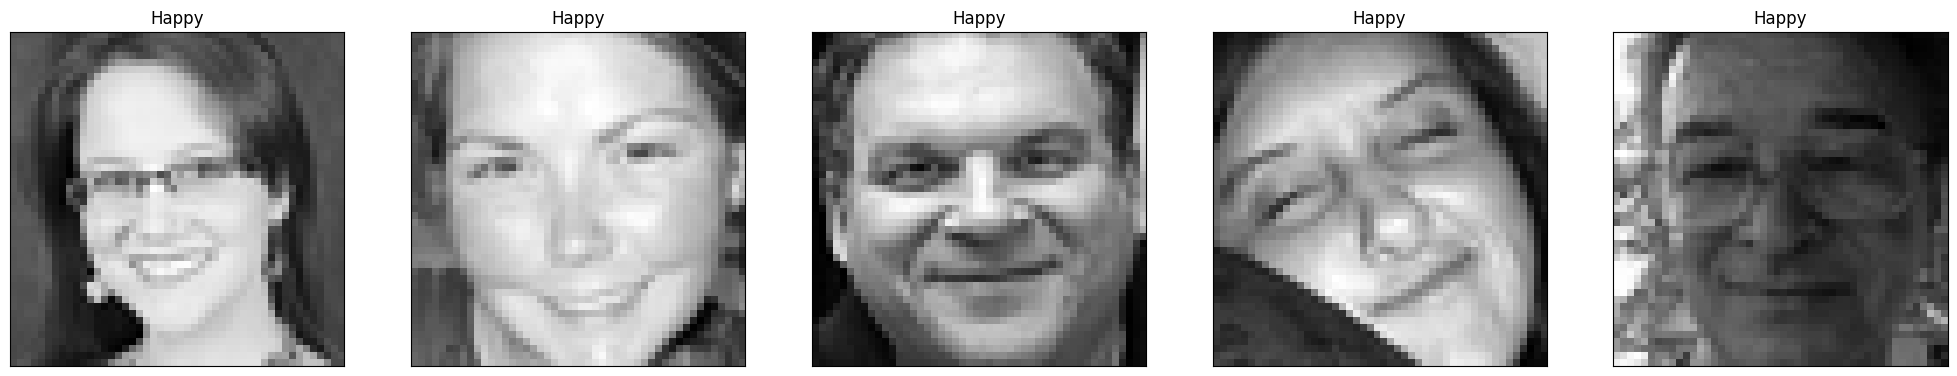

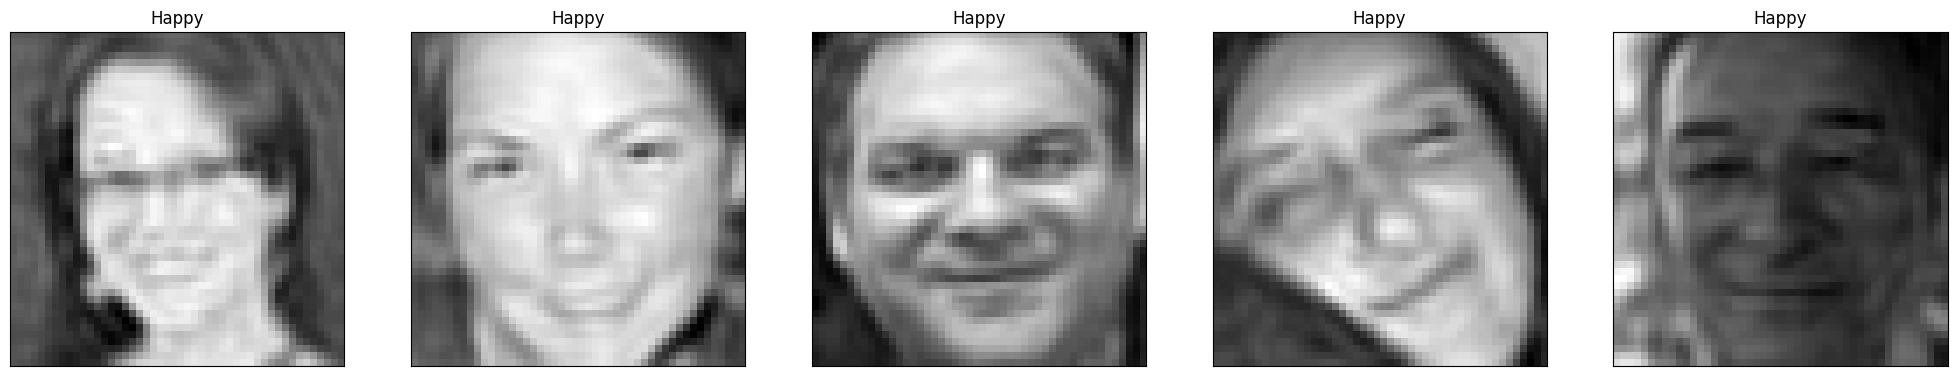

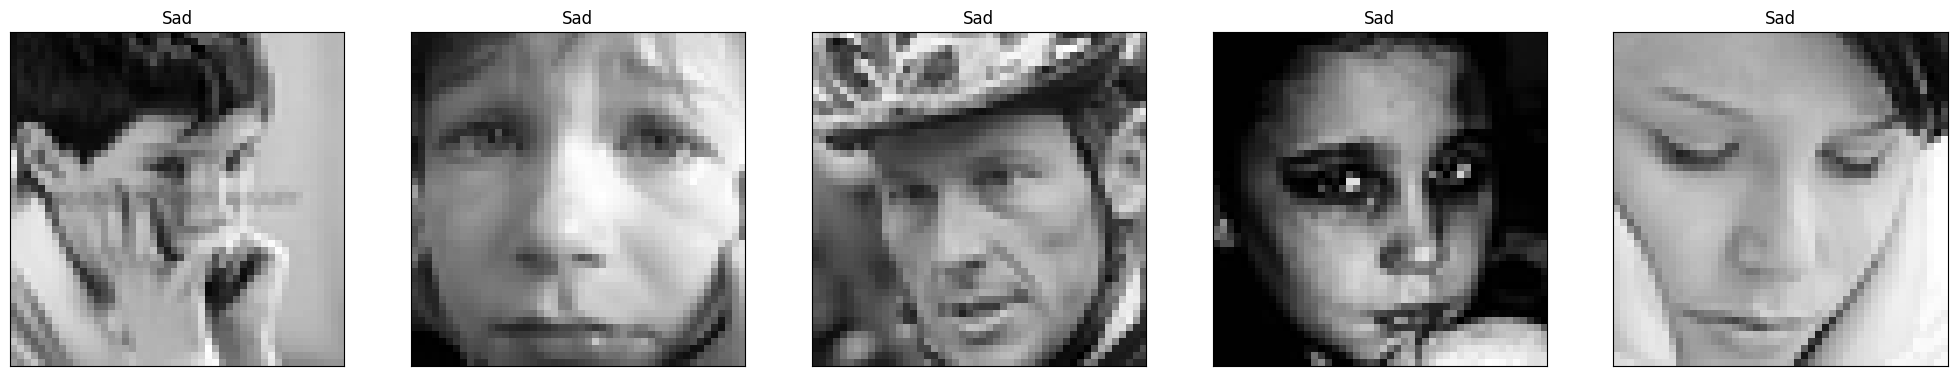

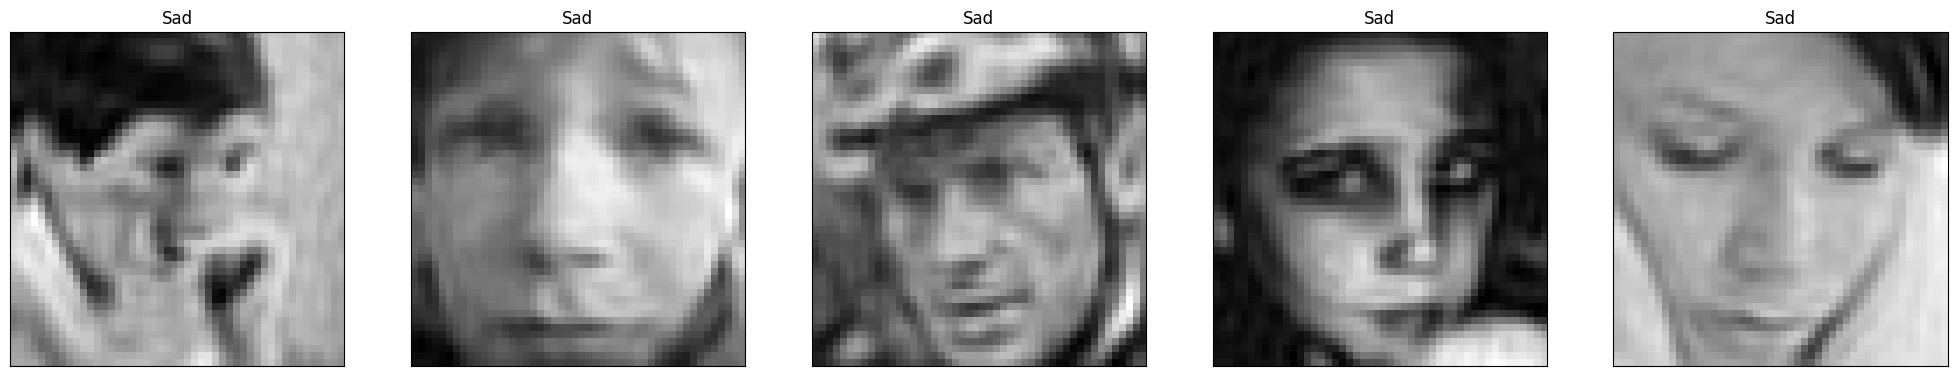

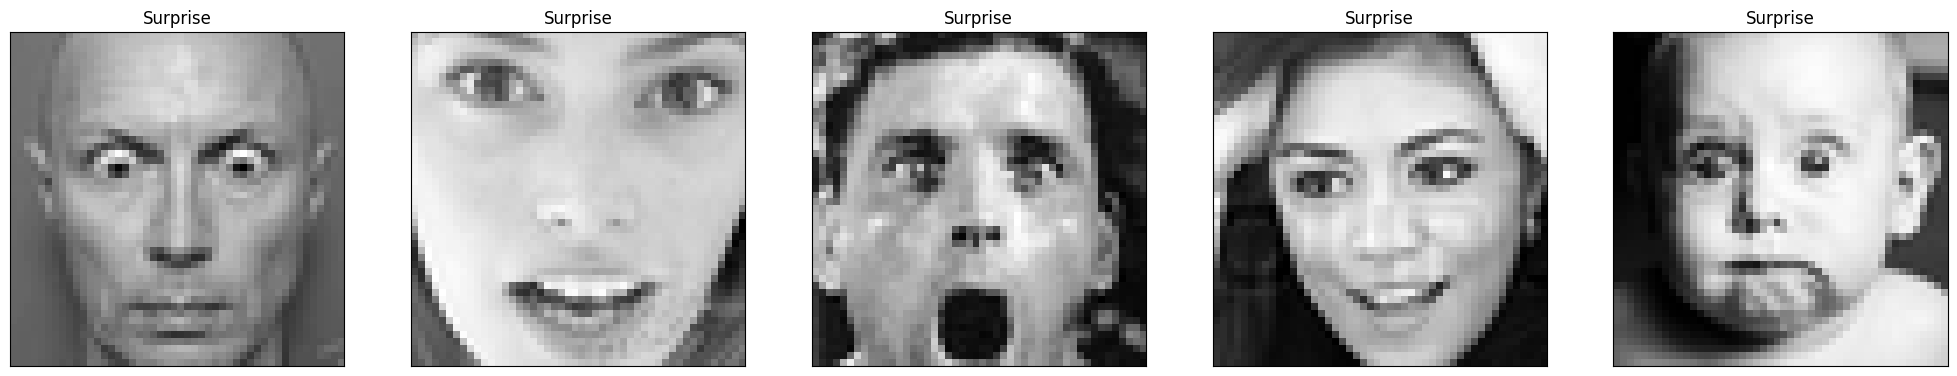

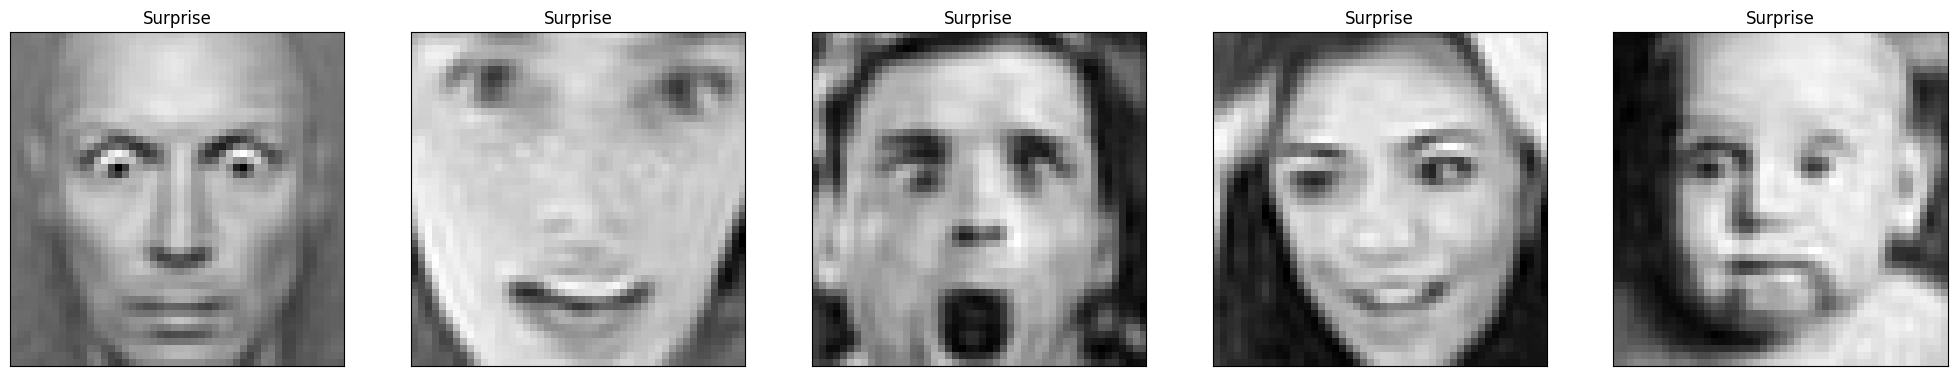

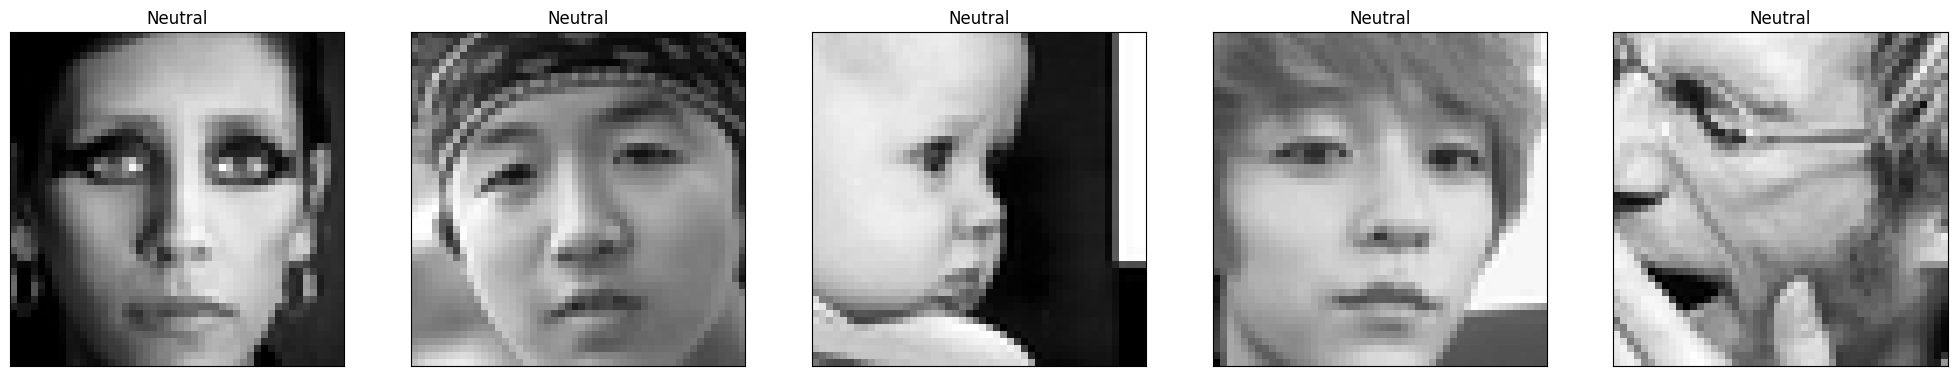

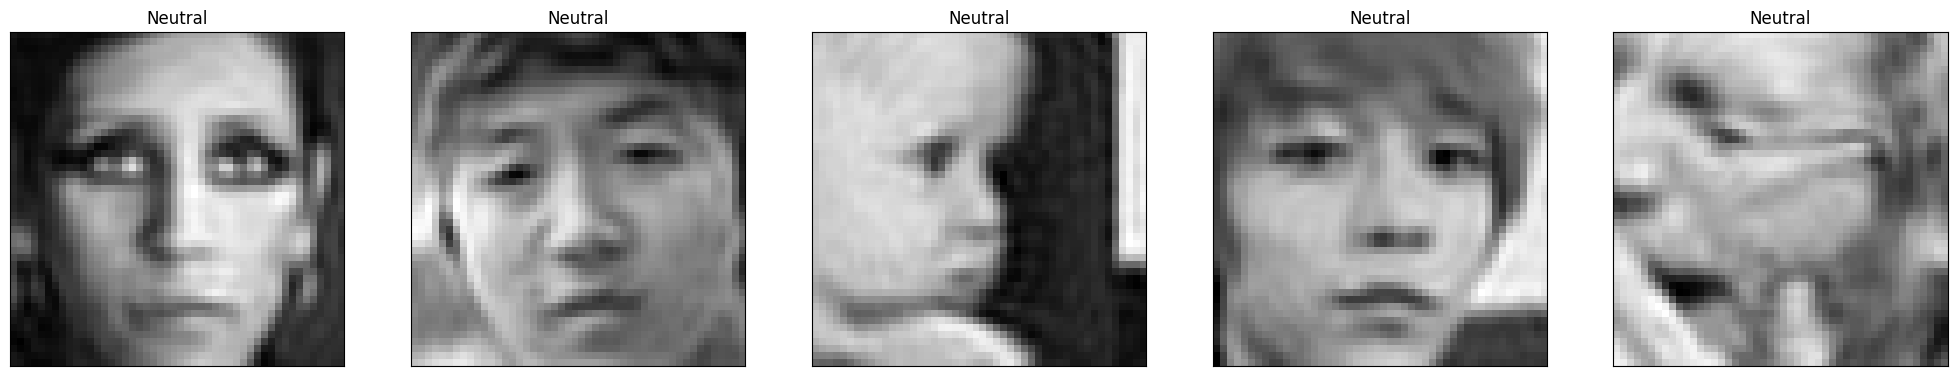

In [38]:
apply_PCA(data= image_array_reshaped, n_images=num_images, n_components= first_component_above_threshold, plot=True)

In this analysis, we applied Principal Component Analysis (PCA) with a manually selected threshold of 97% for the explained variance. Unlike the conventional approach where the number of components is typically chosen based on the standard thresholds of 90% or 95% variance, we opted for a slightly higher precision with 97%. We incremented the components in steps of 25 to find the optimal number of components required to reach this threshold. This approach allows for a more detailed understanding of the dataset's structure and ensures that we capture a significant amount of the variance with fewer components, potentially enhancing the model's performance and interpretability.

To find the first component exceeding the 97% threshold, first, create a boolean array (```components_above_threshold```) that identifies which cumulative explained variance values surpass the threshold. Then, use this boolean array to filter the components array, retaining only those that meet the threshold criteria. Finally, select the first component from this filtered array, which represents the smallest number of components needed to explain at least 97% of the total variance. This ensures that you efficiently determine the minimum number of components required for the desired level of explained variance.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [39]:
## splitting data into train/val/test subsets here
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

TEST_SIZE = 0.2
RANDOM_STATE = 204

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print(f"Training set shape: {x_train.shape}")
print(f"Testing set shape: {x_test.shape}")

Training set shape: (28709, 48, 48)
Testing set shape: (7178, 48, 48)


In [40]:
reshaped_x_train = x_train.reshape(x_train.shape[0], width*height)
reshaped_x_test = x_test.reshape(x_test.shape[0], width*height)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(reshaped_x_train)
scaled_x_test = scaler.fit_transform(reshaped_x_test)

In [42]:
pca_x_train = apply_PCA(scaled_x_train, scaled_x_train.shape[0], first_component_above_threshold)
pca_x_test = apply_PCA(scaled_x_test, scaled_x_test.shape[0], first_component_above_threshold)

In [43]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# Reshape data to 3D for CNN
scaled_x_train_3d = scaled_x_train.reshape(scaled_x_train.shape[0], 48, 48, 1)
scaled_x_test_3d = scaled_x_test.reshape(scaled_x_test.shape[0], 48, 48, 1)

# Create a CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(512, activation='relu'))

# Reduce dimensionality of data
cnn_x_train = cnn_model.predict(scaled_x_train_3d)
cnn_x_test = cnn_model.predict(scaled_x_test_3d)



225/225 [==============================] - 4s 20ms/step


In [44]:
print(pca_x_train.shape)
print(pca_x_test.shape)
print(cnn_x_train.shape)
print(cnn_x_test.shape)

(28709, 426)
(7178, 426)
(28709, 512)
(7178, 512)


In [34]:
# @title
model_dir = '/content/drive/MyDrive/Colab/ML/PJ/Models'
os.makedirs(model_dir, exist_ok=True)

In [35]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression and its parameter grid
log_reg = LogisticRegression(max_iter=1000)
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Function to perform grid search, print results, and save model for Logistic Regression
def perform_log_reg_grid_search(X_train, y_train, X_test, y_test, model_filename):
    grid_search = GridSearchCV(log_reg, log_reg_param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_log_reg = grid_search.best_estimator_
    joblib.dump(best_log_reg, model_filename)
    y_pred = best_log_reg.predict(X_test)
    print("Results for Logistic Regression:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
    return y_pred


# Evaluate Logistic Regression on original data and save model
print("Evaluating Logistic Regression on Original Data:\n")
y_pred_log_reg_original = perform_log_reg_grid_search(cnn_x_train, y_train, cnn_x_test, y_test, os.path.join(model_dir, 'log_reg_original.pkl'))

# Evaluate Logistic Regression on PCA-transformed data and save model
print("Evaluating Logistic Regression on PCA-Transformed Data:\n")
y_pred_log_reg_pca = perform_log_reg_grid_search(pca_x_train, y_train, pca_x_test, y_test, os.path.join(model_dir, 'log_reg_pca.pkl'))


Evaluating Logistic Regression on Original Data:

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Results for Logistic Regression:
Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.14      0.18       965
           1       0.00      0.00      0.00       123
           2       0.26      0.13      0.17      1061
           3       0.41      0.67      0.51      1788
           4       0.30      0.26      0.28      1168
           5       0.46      0.48      0.47       841
           6       0.35      0.38      0.37      1232

    accuracy                           0.37      7178
   macro avg       0.29      0.29      0.28      7178
weighted avg       0.34      0.37      0.34      7178

Accuracy: 0.3675118417386459

Evaluating Logistic Regression on PCA-Transformed Data:

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Results for Logistic Regression:
Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.08      0.11       965
           1       0.00      0.00      0.00       123
           2       0.15      0.07      0.10      1061
           3       0.24      0.40      0.30      1788
           4       0.21      0.21      0.21      1168
           5       0.19      0.21      0.20       841
           6       0.17      0.15      0.16      1232

    accuracy                           0.21      7178
   macro avg       0.16      0.16      0.15      7178
weighted avg       0.19      0.21      0.19      7178

Accuracy: 0.2053496795764837



**RANDOM FOREST**

In [36]:
# Define RandomForest and its parameter grid
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 14, 20, 30]
}

# Function to perform grid search and print results for Random Forest
def perform_rf_grid_search(X_train, y_train, X_test, y_test, model_filename):
    grid_search = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_rf = grid_search.best_estimator_
    joblib.dump(best_rf, model_filename)
    y_pred = best_rf.predict(X_test)
    print("Results for Random Forest:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
    return y_pred

# Evaluate Random Forest on original data
print("Evaluating Random Forest on Original Data:\n")
y_pred_rf_original = perform_rf_grid_search(cnn_x_train, y_train, cnn_x_test, y_test, os.path.join(model_dir, "rf_origin.pkl"))

# Evaluate Random Forest on PCA-transformed data
print("Evaluating Random Forest on PCA-Transformed Data:\n")
y_pred_rf_pca = perform_rf_grid_search(pca_x_train, y_train, pca_x_test, y_test,os.path.join(model_dir, "rf_pca.pkl") )

Evaluating Random Forest on Original Data:

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Results for Random Forest:
Best Parameters: {'max_depth': 30, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.17      0.25       965
           1       0.96      0.22      0.36       123
           2       0.51      0.20      0.28      1061
           3       0.38      0.79      0.51      1788
           4       0.35      0.33      0.34      1168
           5       0.65      0.52      0.58       841
           6       0.42      0.30      0.35      1232

    accuracy                           0.42      7178
   macro avg       0.53      0.36      0.38      7178
weighted avg       0.45      0.42      0.39      7178

Accuracy: 0.41836166062970187

Evaluating Random Forest on PCA-Transformed Data:

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Results for Random Forest:
Best Parameters: {'max_depth': 30, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.02      0.04       965
           1       0.00      0.00      0.00       123
           2       0.24      0.05      0.08      1061
           3       0.25      0.77      0.38      1788
           4       0.22      0.13      0.17      1168
           5       0.30      0.02      0.05       841
           6       0.18      0.09      0.12      1232

    accuracy                           0.24      7178
   macro avg       0.20      0.16      0.12      7178
weighted avg       0.23      0.24      0.17      7178

Accuracy: 0.2415714683755921



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**K-Nearest Neighbors (KNN)**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Define KNN and its parameter grid
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [7],
    'weights': ['uniform', 'distance']
}

# Function to perform grid search, print results, and save model for KNN
def perform_knn_grid_search(X_train, y_train, X_test, y_test, model_filename):
    grid_search = GridSearchCV(knn, knn_param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_knn = grid_search.best_estimator_
    joblib.dump(best_knn, model_filename)
    y_pred = best_knn.predict(X_test)
    print("Results for KNN:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
    return y_pred

# Evaluate KNN on original data and save model
print("Evaluating KNN on Original Data:\n")
y_pred_knn_original = perform_knn_grid_search(cnn_x_train, y_train, cnn_x_test, y_test,  os.path.join(model_dir, 'knn_original.pkl'))

# Evaluate KNN on PCA-transformed data and save model
print("Evaluating KNN on PCA-Transformed Data:\n")
y_pred_knn_pca = perform_knn_grid_search(pca_x_train, y_train, pca_x_test, y_test, os.path.join(model_dir, 'knn_pca.pkl') )

Evaluating KNN on Original Data:

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Results for KNN:
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.23      0.28       965
           1       0.45      0.40      0.42       123
           2       0.39      0.29      0.34      1061
           3       0.44      0.54      0.48      1788
           4       0.33      0.29      0.31      1168
           5       0.55      0.57      0.56       841
           6       0.32      0.40      0.36      1232

    accuracy                           0.40      7178
   macro avg       0.40      0.39      0.39      7178
weighted avg       0.40      0.40      0.39      7178

Accuracy: 0.3987183059348008

Evaluating KNN on PCA-Transformed Data:

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Results for KNN:
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

           0       

**MLP MODEL**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=300)
mlp_param_grid = {
    'hidden_layer_sizes': [(50, 50), (256, 128), (512, 256, 128)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Function to perform grid search, print results, and save model for MLP
def perform_mlp_grid_search(X_train, y_train, X_test, y_test, model_filename):
    grid_search = GridSearchCV(mlp, mlp_param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_mlp = grid_search.best_estimator_
    joblib.dump(best_mlp, model_filename)
    y_pred = best_mlp.predict(X_test)
    print("Results for MLP:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
    return y_pred


# Evaluate MLP on original data and save model
print("Evaluating MLP on Original Data:\n")
y_pred_mlp_original = perform_mlp_grid_search(cnn_x_train, y_train, cnn_x_test, y_test, os.path.join(model_dir, 'mlp_original.pkl'))

# Evaluate MLP on PCA-transformed data and save model
print("Evaluating MLP on PCA-Transformed Data:\n")
y_pred_mlp_pca = perform_mlp_grid_search(pca_x_train, y_train, pca_x_test, y_test, os.path.join(model_dir, 'mlp_pca.pkl'))

Evaluating MLP on Original Data:

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Results for MLP:
Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (512, 256, 128), 'solver': 'adam'}
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.28      0.28       965
           1       0.41      0.31      0.35       123
           2       0.31      0.26      0.28      1061
           3       0.48      0.58      0.53      1788
           4       0.34      0.30      0.32      1168
           5       0.49      0.57      0.53       841
           6       0.36      0.31      0.34      1232

    accuracy                           0.39      7178
   macro avg       0.38      0.37      0.37      7178
weighted avg       0.38      0.39      0.39      7178

Accuracy: 0.3949568124825857

Evaluating MLP on PCA-Transformed Data:

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Results for MLP:
Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (512, 256, 128), 'solver': 'adam'}
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.18      0.17       965
           1       0.02      0.01      0.01       123
           2       0.15      0.17      0.16      1061
           3       0.25      0.19      0.21      1788
           4       0.20      0.22      0.21      1168
           5       0.18      0.19      0.18       841
           6       0.19      0.20      0.20      1232

    accuracy                           0.19      7178
   macro avg       0.16      0.17      0.16      7178
weighted avg       0.19      0.19      0.19      7178

Accuracy: 0.1887712454722764



## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

emotions = {'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'}

def load_model_and_evaluate(model_filename, X_test, y_test):
    model = joblib.load(model_filename)
    y_pred = model.predict(X_test)
    return y_pred

def plot_confusion_matrix(y_true, y_pred, title, emotions):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

In [60]:
base_path = '/content/drive/MyDrive/Colab/ML/PJ/Models/'

# File paths for models
log_reg_original_model = os.path.join(base_path, 'log_reg_original.pkl')
log_reg_pca_model = os.path.join(base_path, 'log_reg_pca.pkl')
rf_original_model = os.path.join(base_path, 'rf_origin.pkl')
rf_pca_model = os.path.join(base_path, 'rf_pca.pkl')
knn_original_model = os.path.join(base_path, 'knn_original.pkl')
knn_pca_model = os.path.join(base_path, 'knn_pca.pkl')
mlp_original_model = os.path.join(base_path, 'mlp_original.pkl')
mlp_pca_model = os.path.join(base_path, 'mlp_pca.pkl')


### Logistic Regression Models

#### Logistic Regression (Original Data)


Evaluating Logistic Regression on Original Data:



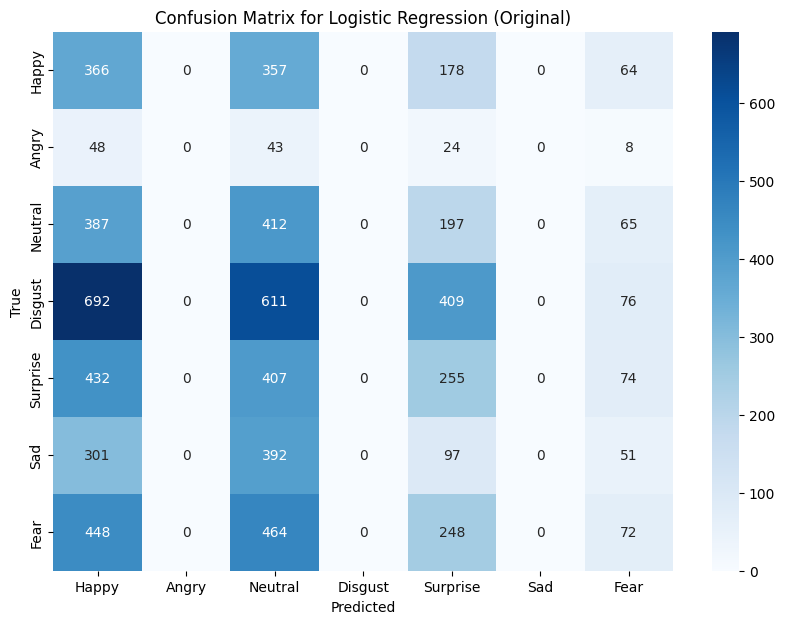

In [69]:
# Logistic Regression on Original Data
print("Evaluating Logistic Regression on Original Data:\n")
y_pred_log_reg_original = load_model_and_evaluate(log_reg_original_model, cnn_x_test, y_test)
plot_confusion_matrix(y_test, y_pred_log_reg_original, "Confusion Matrix for Logistic Regression (Original)", emotions)

- **Best Parameters**: `{'C': 10, 'solver': 'lbfgs'}`
- **Accuracy**: 0.3675
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Neutral" with 412 correctly classified samples
  - **Most Errors**: "Disgust" with many samples misclassified as "Happy" and "Sad."




#### Logistic Regression (PCA-Transformed Data)


Evaluating Logistic Regression on PCA-Transformed Data:



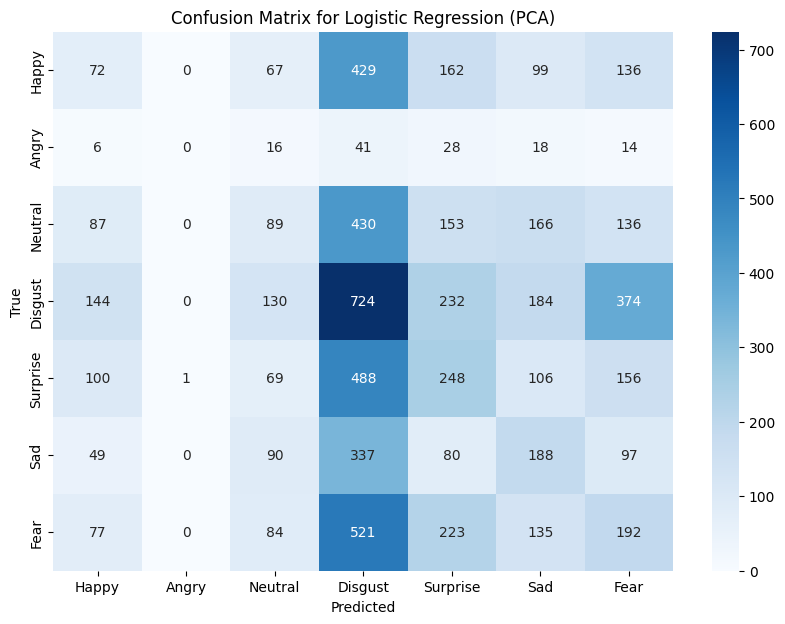

In [62]:
# Logistic Regression on PCA-Transformed Data
print("Evaluating Logistic Regression on PCA-Transformed Data:\n")
y_pred_log_reg_pca = load_model_and_evaluate(log_reg_pca_model, pca_x_test, y_test)
plot_confusion_matrix(y_test, y_pred_log_reg_pca, "Confusion Matrix for Logistic Regression (PCA)", emotions)

- **Best Parameters**: `{'C': 0.01, 'solver': 'liblinear'}`
- **Accuracy**: 0.2053
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Disgust" with 724 correctly classified samples.
  - **Most Errors**: "Fear" and "Surprise" with many samples misclassified into other classes, especially "Disgust."

### Random Forest Models

#### Random Forest (Original Data)

Evaluating Random Forest on Original Data:



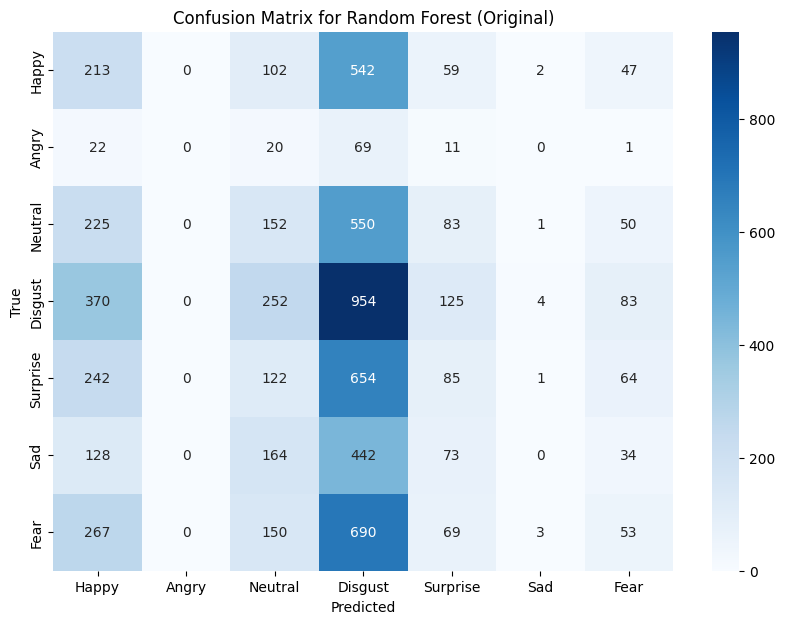

In [63]:
# Random Forest on Original Data
print("Evaluating Random Forest on Original Data:\n")
y_pred_rf_original = load_model_and_evaluate(rf_original_model, cnn_x_test, y_test)
plot_confusion_matrix(y_test, y_pred_rf_original, "Confusion Matrix for Random Forest (Original)", emotions)


- **Best Parameters**: `{'max_depth': 30, 'n_estimators': 200}`
- **Accuracy**: 0.4184
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Disgust" class with 954 correctly classified instances.
  - **Most Errors**: "Fear" class with 690 instances misclassified as "Disgust."


#### Random Forest (PCA-Transformed Data)


Evaluating Random Forest on PCA-Transformed Data:



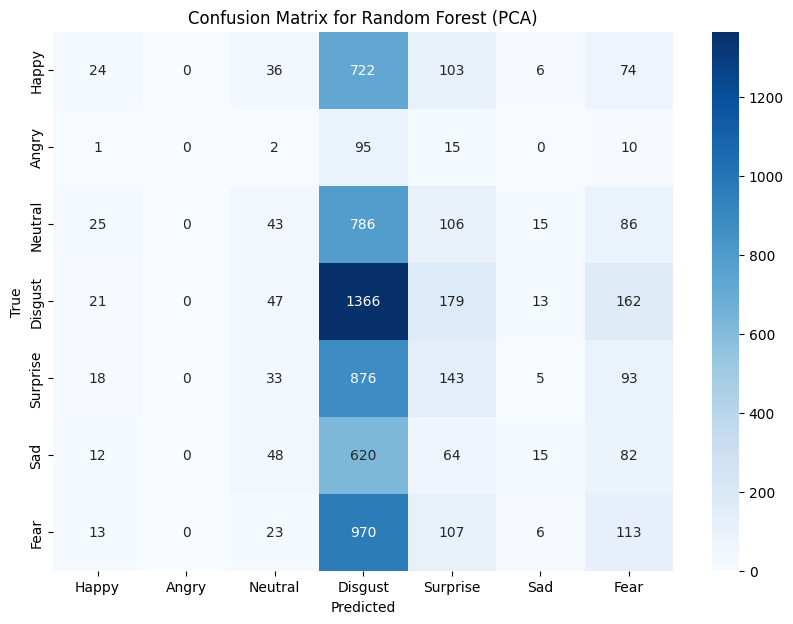

In [64]:
# Random Forest on PCA-Transformed Data
print("Evaluating Random Forest on PCA-Transformed Data:\n")
y_pred_rf_pca = load_model_and_evaluate(rf_pca_model, pca_x_test, y_test)
plot_confusion_matrix(y_test, y_pred_rf_pca, "Confusion Matrix for Random Forest (PCA)", emotions)

- **Best Parameters**: `{'max_depth': 30, 'n_estimators': 200}`
- **Accuracy**: 0.2416
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Disgust" class with 1366 correctly classified instances.
  - **Most Errors**: "Fear" with many samples misclassified as "Disgust."

### KNN Models

#### KNN (Original Data)


Evaluating KNN on Original Data:



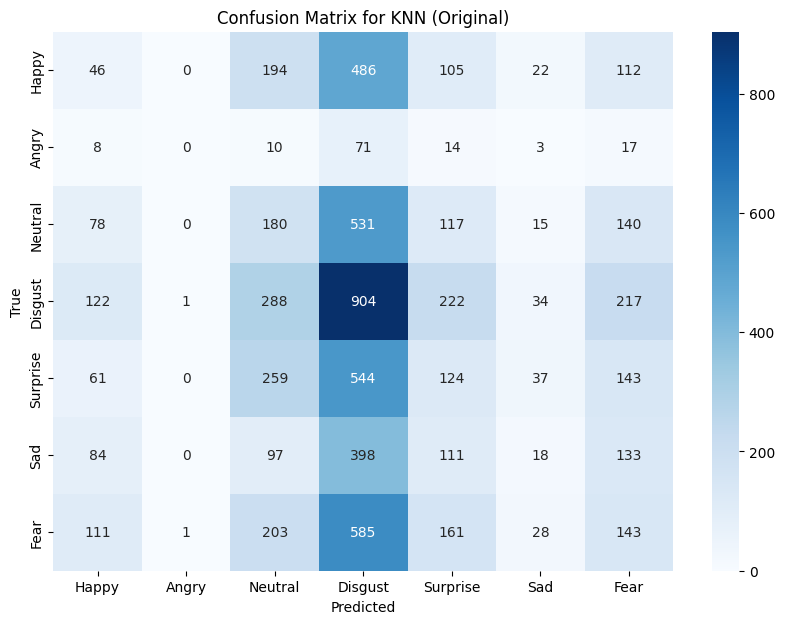

In [65]:
# KNN on Original Data
print("Evaluating KNN on Original Data:\n")
y_pred_knn_original = load_model_and_evaluate(knn_original_model, cnn_x_test, y_test)
plot_confusion_matrix(y_test, y_pred_knn_original, "Confusion Matrix for KNN (Original)", emotions)

- **Best Parameters**: `{'n_neighbors': 7, 'weights': 'distance'}`
- **Accuracy**: 0.3987
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Disgust" with 904 correctly classified samples.
  - **Most Errors**: "Fear" and "Neutral" with many samples misclassified as "Disgust."

#### KNN (PCA-Transformed Data)

Evaluating KNN on PCA-Transformed Data:



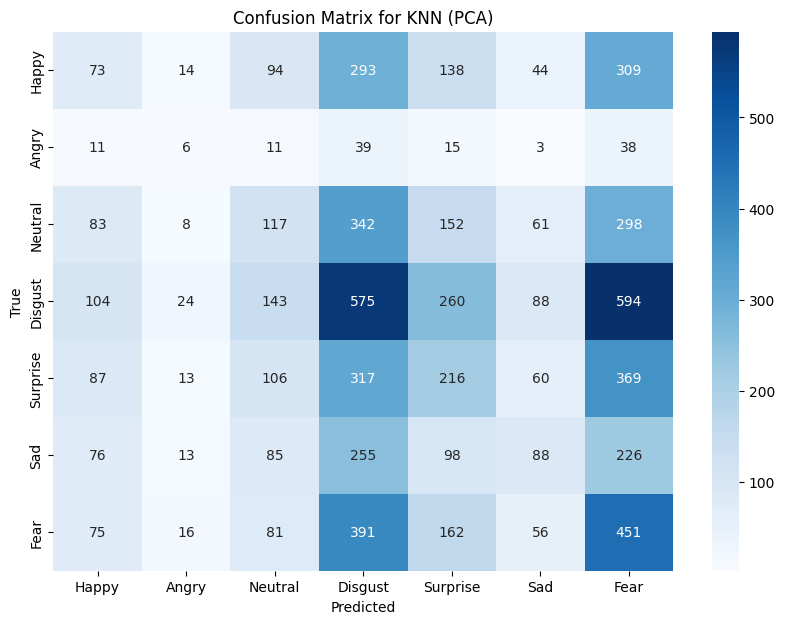

In [66]:
# KNN on PCA-Transformed Data
print("Evaluating KNN on PCA-Transformed Data:\n")
y_pred_knn_pca = load_model_and_evaluate(knn_pca_model, pca_x_test, y_test)
plot_confusion_matrix(y_test, y_pred_knn_pca, "Confusion Matrix for KNN (PCA)", emotions)

- **Best Parameters**: `{'n_neighbors': 7, 'weights': 'distance'}`
- **Accuracy**: 0.2140
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Disgust" with 575 correctly classified samples.
  - **Most Errors**: "Neutral" and "Fear" with many samples misclassified as "Disgust."


### MLP Models

#### MLP (Original Data)


Evaluating MLP on Original Data:



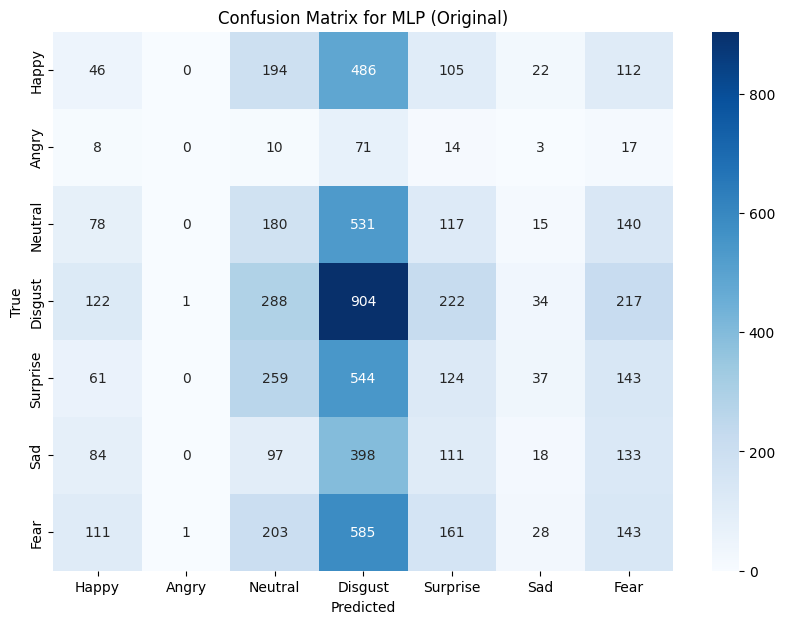

In [67]:
# MLP on Original Data
print("Evaluating MLP on Original Data:\n")
y_pred_mlp_original = load_model_and_evaluate(mlp_original_model, cnn_x_test, y_test)
plot_confusion_matrix(y_test, y_pred_knn_original, "Confusion Matrix for MLP (Original)", emotions)

- **Best Parameters**: `{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (512, 256, 128), 'solver': 'adam'}`
- **Accuracy**: 0.3949
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Disgust" with 904 correctly classified samples.
  - **Most Errors**: "Fear" and "Neutral" with many samples misclassified as "Disgust."

#### MLP (PCA-Transformed Data)


Evaluating MLP on PCA-Transformed Data:



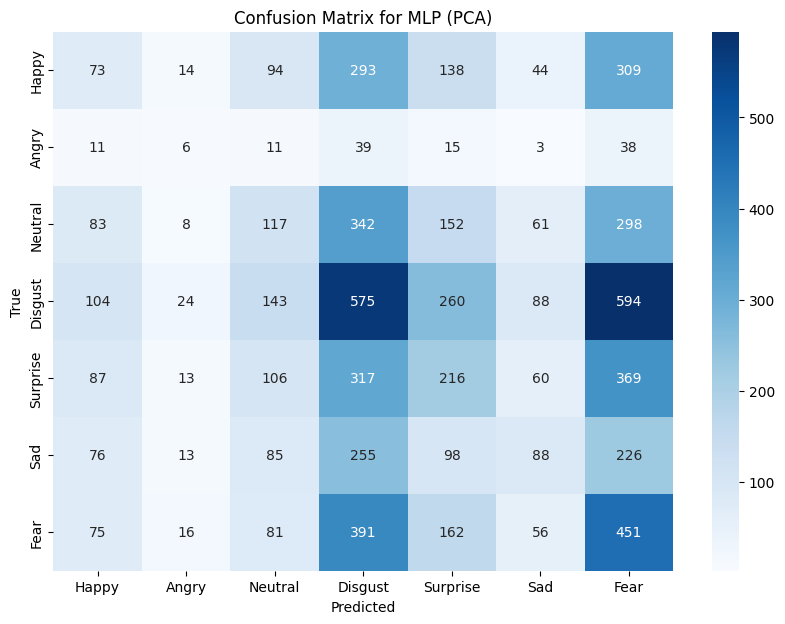

In [68]:
# MLP on PCA-Transformed Data
print("Evaluating MLP on PCA-Transformed Data:\n")
y_pred_mlp_pca = load_model_and_evaluate(mlp_pca_model, pca_x_test, y_test)
plot_confusion_matrix(y_test, y_pred_knn_pca, "Confusion Matrix for MLP (PCA)", emotions)

- **Best Parameters**: `{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (512, 256, 128), 'solver': 'adam'}`
- **Accuracy**: 0.1888
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Disgust" with 575 correctly classified samples.
  - **Most Errors**: "Neutral" and "Fear" with many samples misclassified as "Disgust."

### Overall Performance Summary


#### Best Performing Model
- **Model**: Random Forest (Original Data)
- **Reason**:
  - **Highest Accuracy**: The Random Forest model trained on the original data achieved the highest accuracy of 0.4184 among all the models tested.
  - **Complex Relationships**: This model utilizes a `max_depth` of 30 and `n_estimators` of 200, allowing it to capture complex relationships within the data more effectively. These parameters help the model to explore deeper structures in the data, providing a more accurate classification.
  - **Versatility**: Random Forest is an ensemble learning method, which combines the predictions of multiple decision trees. This versatility allows it to perform better in varied and noisy data conditions compared to single-model approaches.

#### Most Accurate Emotion Category
- **Class "Disgust"**:
  - **Reason**:  The "Disgust" class is the most accurately predicted class across most models. This could be due to the clear and distinctive features of this emotion, making it less ambiguous compared to others.

#### Emotion Categories with Most Errors
- **Classes "Fear" and "Neutral"**:
  - **High Misclassification Rates**: Most models struggled significantly with the "Fear" and "Neutral" classes, often misclassifying them into other categories. This suggests that the features of these emotions overlap significantly with other emotions, making them harder to distinguish.
  - **Ambiguity and Similarity**: The inherent ambiguity and similarity of "Fear" and "Neutral" with other emotions like "Sad" and "Angry" contribute to the higher misclassification rates. These emotions may share common features, leading to confusion in the model's predictions.
  - **Class Imbalance**: If the dataset has fewer examples of "Fear" and "Neutral" compared to more prevalent emotions like "Happy," the models may not have had enough data to learn the subtle distinctions. This imbalance can result in poorer performance for these categories.


